In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading dataset
data=pd.read_csv('C:/Users/adm/Documents/Python Scripts/Dataset/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


What does the data look like?

Each row gives details for all of the 7,034 individual customers, e.g. the length of their tenure, internet service type, contract type, monthly charges. The target for prediction is the ‘Churn’ column, indicating whether or not the customer cancelled their service.

In [3]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

- **customerID** - Customer ID
- **gender** - Whether the customer is a senior citizen or not (1, 0)
- **SeniorCitizen** - Whether the customer is a senior citizen or not (1, 0)
- **Partner** - Whether the customer has a partner or not (Yes, No)
- **Dependents** - Whether the customer has dependents or not (Yes, No)
- **tenure** - Number of months the customer has stayed with the company
- **PhoneService** - Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** - Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** - Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** - Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** - Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** - Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** - Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** - Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** - Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** - The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** - Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** - The amount charged to the customer monthly
- **TotalCharges** - The total amount charged to the customer
- **Churn** - Whether the customer churned or not (Yes or No)

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#Find blanks in data
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Pandas didn’t detect all of the values in the ‘TotalCharges’ column to be float64 type, so we probably have some non-numeric data in the column.

In [6]:
# Convert it to numeric.

print (data.loc[data['TotalCharges'].isna()==True])
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce') 
#If 'coerce', then invalid parsing will be set as NaN

# data['TotalCharges'] = pd.to_numeric(data['TotalCharges']) 
# ValueError: Unable to parse string " " at position 488

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [7]:
data['TotalCharges'].isnull().sum()

11

In [8]:
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
data[data.tenure == 0].TotalCharges

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

Looks like the blank ‘TotalCharges’ values were for customers with 0 months tenure. We will adjust these values to $0.

In [10]:
data[data['TotalCharges'].isna()==True] = 0

In [11]:
data[data.tenure == 0].TotalCharges

488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
3331    0.0
3826    0.0
4380    0.0
5218    0.0
6670    0.0
6754    0.0
Name: TotalCharges, dtype: float64

In [12]:
data['TotalCharges'].isnull().sum()

0

In [13]:
data['OnlineBackup'].head()
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

Next we’ll convert the categorical values into numeric values, so our ML algorithms can process the data. We will also remove the columns not used in the predictive model.

In [14]:
data['gender'].replace(['Male','Female'], [0,1], inplace=True)
data['Partner'].replace(['Yes','No'], [1,0], inplace=True)
data['Dependents'].replace(['Yes','No'], [1,0], inplace=True)
data['PhoneService'].replace(['Yes','No'], [1,0], inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'], [0,0,1], inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'], [0,1,2], inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'], [0,1,0], inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'], [0,1,0], inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'], [0,1,0], inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'], [0,1,0], inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'], [0,1,0], inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'], [0,1,0], inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'], [0,1,2], inplace=True)
data['PaperlessBilling'].replace(['Yes','No'], [1,0], inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
                               'Credit card (automatic)'], [0,1,2,3], inplace=True)
data['Churn'].replace(['Yes','No'], [1,0], inplace=True)

data.pop('customerID')
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


# Correlations between customer data features and customer churn

To decide which features of the data to include in our predictive churn model, we’ll examine the correlation between churn and each customer feature.

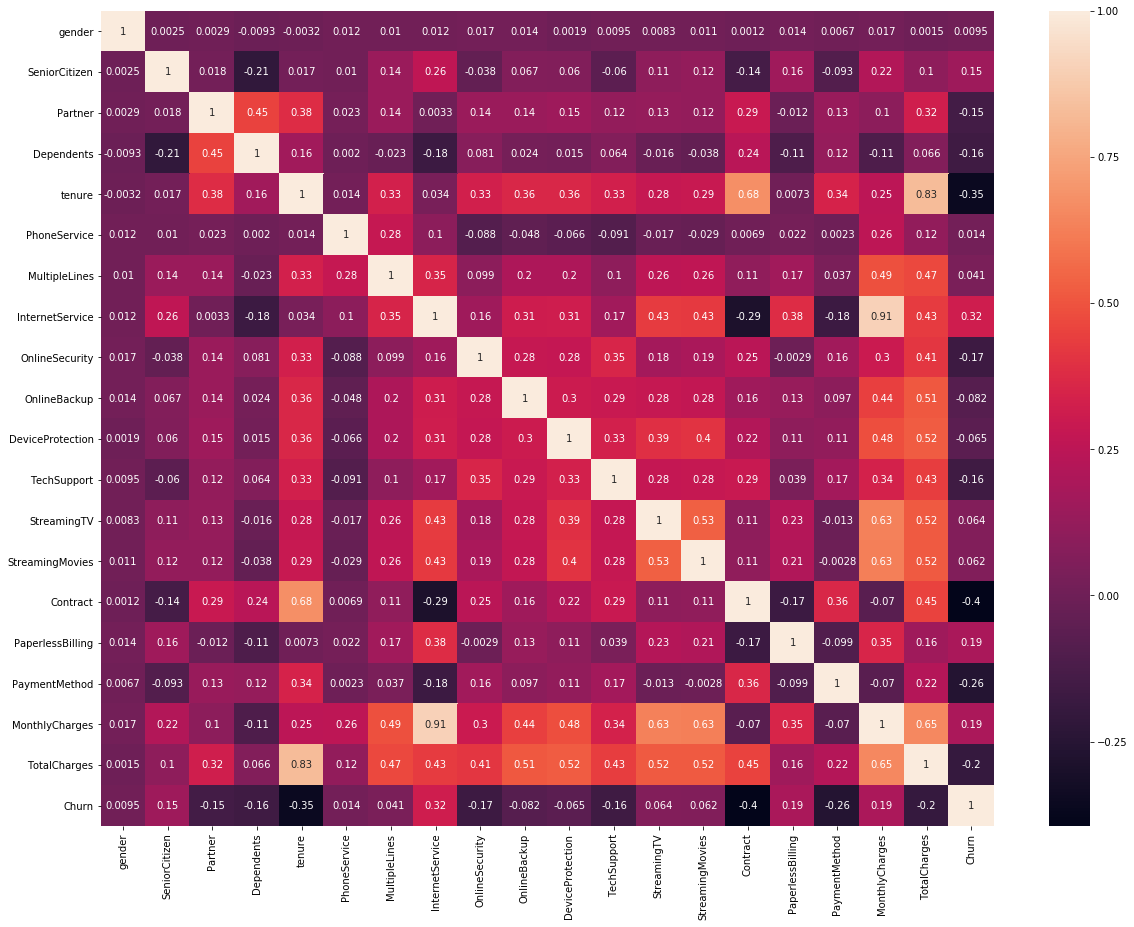

In [16]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Avoiding multicollinearity

Total charges and monthly charges are highly correlated. We try to avoid strongly correlated explanatory variables in regression models. Correlation of explanatory variables is known as multicollinearity, and perfect multicollinearity occurs when the correlation between two independent variables is equal to 1 or -1.

Consider,two people are pushing a boulder up a hill. You want to know how hard each of them is pushing. Suppose that you watch them push together for ten minutes and the boulder moves 10 feet. Did the first guy do all the work and the second just fake it? Or vice versa? Or 50-50? Since both forces are working at the exact same time, you can’t separate the strength of either one separately. All that you can say is that their combined force is 1 foot per minute.

Now imagine that the first guy pushes for a minute himself, then nine minutes with the second guy, and a final minute is just the second guy pushing. Now you can use estimates of forces in the first and last minutes to figure out each person’s force separately. Even though they are still largely working at the same time, the fact that there is a bit of difference lets you get estimates of the force for each.

If you saw each man pushing independently for a full ten minutes, that would give you more precise estimates of the forces than if there is a large overlap in the forces.

In [17]:
data.pop('TotalCharges')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

# Predictive modelling


In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.25)

train_y = train['Churn']
test_y = test['Churn']

train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

4457    0
2777    0
1229    0
2569    0
3646    0
5532    0
1446    0
2739    0
601     0
1812    0
6650    0
1230    0
2915    0
1967    1
3622    0
317     1
1061    0
6077    0
3961    0
603     0
4675    1
3549    0
1342    0
6605    1
3585    0
4763    0
1969    0
4447    0
4985    0
3517    1
       ..
5236    0
3717    0
5870    1
118     0
5001    1
4738    1
1505    1
2800    0
5517    0
5851    0
2662    1
2027    0
1835    0
4859    0
1766    0
5040    0
6622    1
4569    1
6822    1
5514    0
4420    0
112     0
3451    0
720     0
1698    0
3153    0
448     0
1110    0
5221    0
5157    0
Name: Churn, Length: 1761, dtype: int64

# Logistic regression
Logistic regression is one of the more basic classification algorithms in a data scientist’s toolkit. It is used to predict a category or group based on an observation. Logistic regression is usually used for binary classification (1 or 0, win or lose, true or false). The output of logistic regression is a probability, which will always be a value between 0 and 1. While the output value does not give a classification directly, we can choose a cutoff value so that inputs with with probability greater than the cutoff belong to one class, and those with less than the cutoff belong to the other.

For example, if the classifier predicts a probability of customer attrition being 70%, and our cutoff value is 50%, then we predict that the customer will churn. Similarly, if the model outputs a 30% chance of attrition for a customer, then we predict that the customer won’t churn.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)

test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))

# confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
# heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
# plt.ylabel('True label', fontsize = 14)
# plt.xlabel('Predicted label', fontsize = 14)

Accuracy of logistic regression classifier on test set: 0.80
             precision    recall  f1-score   support

          0       0.84      0.88      0.86      1300
          1       0.62      0.54      0.58       461

avg / total       0.79      0.80      0.79      1761



## Classification Report
- **precision** - is proportion of the correct predicted class from the predicted class    - **Higher the better**
- **recall**    - is proportion of the correct predicted class from actual class           - **Higher the better**
- **f1-score**  - is a measure of a test's accuracy                                        - **Higher the better**
- **support**   - is the number of samples of the true response that lie in that class

We got 80% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logisticRegr = LogisticRegression(class_weight= 'balanced')
logisticRegr.fit(X=train_x, y=train_y)

test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))

# confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
# heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
# heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
# heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
# plt.ylabel('True label', fontsize = 14)
# plt.xlabel('Predicted label', fontsize = 14)

Accuracy of logistic regression classifier on test set: 0.73
             precision    recall  f1-score   support

          0       0.91      0.71      0.80      1300
          1       0.49      0.79      0.61       461

avg / total       0.80      0.73      0.75      1761



# How to handle imbalanced classes

It is also important to look at the distribution of how many customers churn. If 95% of customers don’t churn, we can achieve 95% accuracy by building a model that simply predicts that all customers won’t churn. But this isn’t a very useful model, because it will never tell us when a customer will churn, which is what we are really interested in.

In [21]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The class for churn is only around 25% of the total population of samples. There is a real risk that a model trained on this data may only make too many predictions in favour of the majority class. There are a number of techniques for handling imbalanced classes:

# Up-sampling the minority class

To balance the data set, we can randomly duplicate observations from the minority class. This is also known as re sampling with replacement:

In [22]:
from sklearn.utils import resample

data_majority = data[data['Churn']==0]
data_minority = data[data['Churn']==1]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5174, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

Now that we have a 1:1 ratio for our classes, let’s train another logistic regression model:

In [23]:
train, test = train_test_split(data_upsampled, test_size = 0.25)

train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']

train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')

logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)

test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, 
                                                                                                          test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.76
             precision    recall  f1-score   support

          0       0.77      0.72      0.75      1286
          1       0.74      0.79      0.77      1301

avg / total       0.76      0.76      0.76      2587



The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved. There are a number of other ways to deal with imbalanced classes, including:

Down-sampling the majority class

Similar to the above method, we reduce the number of samples in the majority class to be equal to the number of samples in the minority class.

# Using a different performance metric:

Area Under ROC Curve (AUROC) represents the likelihood of a model distinguishing observations between two classes. In very simple terms, AUROC gives a single measure of how a model’s true positive rate and false positive rate change with different threshold values. The closer a model’s AUROC score is to 1, the better it is. To calculate AUROC, we need the predicted class probabilities:

In [24]:
from sklearn.metrics import roc_auc_score

# Get class probabilities for both models
test_y_prob = logisticRegr.predict_proba(test_x)
test_y_prob_balanced = logisticRegr_balanced.predict_proba(test_x_upsampled)

# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]

print('Unbalanced model AUROC: ' + str(roc_auc_score(test_y, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.8372684798932086
Balanced model AUROC: 0.838680139574415


Interestingly, the AUROC scores are very similar between the two models. Both are above 0.5 however, suggesting that both models have the ability to distiguish between observations from each class.



# Tree-based algorithms

Using tree-based algorithms such as decision trees or random forests can result in good models for unbalanced datasets. If the minority class exists in one area of the feature space, a tree will be able to separate the class into a single node. For example, if 99% of customers who stream movies tend to churn, then a tree-based algorithm will likely pick this up. We will look at the results for two of these algorithms in the next section.

# Decision Trees

A decision tree is a supervised learning method that makes a prediction by learning simple decision rules from the explanatory variables. Decision trees have the following advantages:

- Trees can be visualised, which makes them easy to interpret
- They can handle numerical and categorical data
- We can easily validate the model using statistical tests

The downsides to decision trees:

- Decision trees are very prone to overfitting the training data, and often do not generalise well
- Small variations in the training data can cause a completely different tree to be generated
- Decision tree learning algorithms are based on heuristic algorithms like the greedy algorithm, which make locally optimal decisions at each node. These algorithms cannot guarantee a globally optimal decision tree

Despite their downsides, decision trees can be a good starting point for developing predictive models that generalise better, like random forests.

In [25]:
from sklearn import tree
import graphviz 

In [27]:
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)

# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)

# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(train_x.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
#graph.render('decision_tree.gv', view=True)

# Trimming the tree

We have set the maximum depth of the tree to 4 in the above example. The other variable controlling the size of the tree is ‘min_samples_leaf’, which specifies the minimum number of samples required to split an internal node. The default depth and minimum samples per leaf are set to unlimited, which leads to fully grown and unpruned trees, like this:

An unpruned tree is effectively trying to sort every training example ‘perfectly’ into its own leaf. We will get very good ‘accuracy’ when testing against the training set, but it is likely that the model is over fitted. Let’s see what kind of accuracy each of the trees get on test and training sets:

In [28]:
test_y_pred_dt = decisionTree.predict(test_x)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))

Accuracy of decision tree classifier on test set: 0.78


Exactly as we suspected! The unpruned tree gets a perfect score on the training set, but a relatively lower score (73%) on the test set. Our pruned tree is less accurate on the training set, but performs better when presented with the out-of-sample test data.

# Random forests
Random forests are an ensemble learning method, where the results from multiple decision trees are combined to make a final prediction. For example, a random forest may be made up of 10 decision trees, 7 of which make a prediction for ‘churn’ and 3 of which make a prediction for ‘no churn’. The final prediction for the forest will be ‘churn’.

Tree ensembles have become very popular due to their impressive performance on many real world problems.

In [29]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))

Accuracy of random forest classifier on test set: 0.78


C:\Users\adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [30]:
train_x.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype=object)

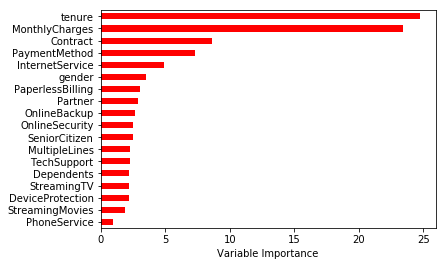

In [31]:
Importance = pd.DataFrame({'Importance':randomForest.feature_importances_*100}, index=train_x.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [32]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
train_x1 = train_x[['MonthlyCharges', 'PaymentMethod', 'InternetService', 'tenure', 'Contract']]
randomForest.fit(train_x1, train_y)
test_x1 = test_x[['MonthlyCharges', 'PaymentMethod', 'InternetService', 'tenure', 'Contract']]
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x1, test_y)))

Accuracy of random forest classifier on test set: 0.76


In [33]:
randomForest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
print (train_x1.columns.values)
print (test_x1.columns.values)

print (train_x.columns.values)
print (test_x.columns.values)

['MonthlyCharges' 'PaymentMethod' 'InternetService' 'tenure' 'Contract']
['MonthlyCharges' 'PaymentMethod' 'InternetService' 'tenure' 'Contract']
['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges']
['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges']


In [35]:
from sklearn.cross_validation import cross_val_score

CVscore=cross_val_score(RandomForestClassifier(),train_x1,train_y,cv=10)
print(CVscore)
print(CVscore.mean())

C:\Users\adm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.78827977 0.78638941 0.76181474 0.77882798 0.74621212 0.76136364
 0.75757576 0.75       0.78178368 0.77798861]
0.7690235720429455


# Conclusion

Predicting customer churn with machine learning presents many interesting challenges. Building the best predictive model means having a good understanding of the underlying data. Different models can be implemented and tested relatively quickly using the Python sklearn package.